# Setup

In [1]:
%matplotlib inline

In [2]:
# Library imports

from fastai import *
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(42) # for reproducible random numbers

In [3]:
import fastai; fastai.__version__

'2.5.2'

In [4]:
# Change this to another device (0-7) if you run out of memory
# Goto Kernel->Restart&Clear Output after changing the device
torch.cuda.set_device(2)

In [5]:
# Batch size: https://docs.paperspace.com/machine-learning/wiki/epoch
# Typically 32 works fine, feel free to experiment with it
# If you run out of memory, try to lower the number
bs = 32

# Get Data

We'll use the MNIST Dataset (http://yann.lecun.com/exdb/mnist/) and try to predict handwritten digits.

Here's a list of available datasets: https://docs.fast.ai/data.external.html

In [6]:
drone_one= open("drone1.txt","w+")
drone_two= open("drone2.txt","w+")
drone_three= open("drone3.txt","w+")
drone_four= open("drone4.txt","w+")

In [7]:
drone_one.write("[0,0] \r\n")
x=0
for w in range(15):
    drone_one.write("[0,%d] \r\n" % (w+1))
for i in range(15):
    drone_one.write("[%d,0] \r\n" % (i+1))
    x=x+1
    for y in range(15):
        drone_one.write("["+ str(x) +",%d] \r\n" % (y+1))

drone_one.close()

In [8]:
w=15
t=0
for o in range(15):
    w=w+1
    drone_two.write("[0,%d] \r\n" % (w))
for o in range(15):
    drone_two.write("[%d,16] \r\n" % (o+1))
    w=15
    t=t+1
    for g in range(15):
        w= w+1
        drone_two.write("["+str(t)+",%d] \r\n" % (w))
drone_two.close()

In [9]:
q=15

for s in range(15):
    q=q+1
    for w in range(16):
        drone_three.write("["+str(q)+",%d] \r\n" % (w))
        w+1

drone_three.close()

In [10]:
m=15
n=15
for s in range(15):
    m=m+1
    
    for w in range(16):
        
        drone_four.write("["+str(m)+",%d] \r\n" % (w+15))
        w+1

drone_four.close()

In [11]:
pwd

'/home/ele_group_3/ml'

In [12]:
path = '/home/ele_group_3/ml/competition_group3/'

In [13]:
import pandas as pd

read_file = pd.read_csv (r'labels_group3.txt')
read_file.to_csv (r'labels_group3.csv', index=None)

# Step 1 - Data Loader

In [14]:
#fname = get_image_files(path)
#fnames
df = pd.read_csv('/home/ele_group_3/ml/labels_group3.csv', dtype = str, sep = ';')
df.head()

,id,label
0,000,common_wheat
1,001,common_wheat
2,002,common_wheat
3,003,common_wheat
4,004,common_wheat


In [15]:
#def label_func(df): 
#    dir_name = os.df.dirname(df)
#    split_dir_name = dir_name.split(" ")
#    dir_length = len(split_dir_name)
#    label = split_dir_name[dir_length - 1]
#    return(label)

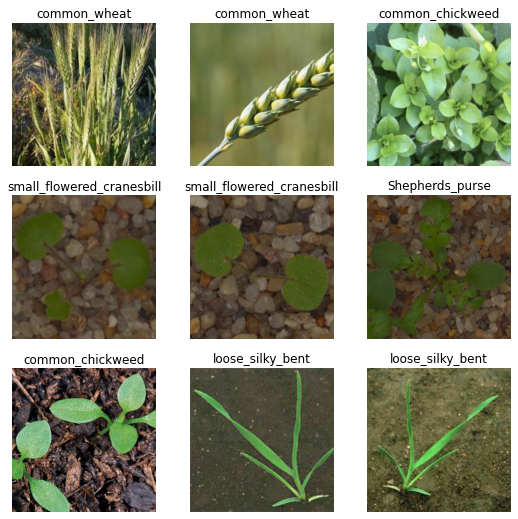

In [16]:
dls = ImageDataLoaders.from_df(df, path, suff='.png', item_tfms=Resize(300), valid_pct=(0.2), seed = 42)
#dls = dblock.dataloaders(df)
dls.show_batch(max_n=9)

In [17]:
#dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
#                   get_items = get_image_files,
#                   get_y = label_func,
#                   splitter  = RandomSplitter(),
#                  item_tfms = Resize(224))
#dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
#                   splitter=ColSplitter(),
#                   get_x=ColReader('fname', pref=str(path/'lables_group3') + os.path.sep),
#                   get_y=ColReader('label', label_delim=' '),
#                   item_tfms = Resize(460),
#                   batch_tfms=aug_transforms(size=224))

In [18]:
#dls = ImageDataLoaders.from_df(df, path, suff='.png', item_tfms=Resize(300), valid_pct=(0.2), seed = 42)
#dls = dblock.dataloaders(df)
#dls.show_batch(max_n=9)

In [19]:
print(dls.vocab)
len(dls.vocab)


['Shepherds_purse', 'Sugar_beet', 'black_grass', 'charlock', 'cleavers', 'common_chickweed', 'common_wheat', 'fat_hen', 'loose_silky_bent', 'maiz', 'scentless_mayweed', 'small_flowered_cranesbill']


12

# Step 2 - Building a Model

In [20]:
learner = cnn_learner(dls, resnet152, metrics=error_rate) #.to_fp16()

In [21]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

# Step 3 - Learning

In [22]:
learner.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,3.594259,2.339537,0.777778,00:13
1,2.959447,1.697148,0.594444,00:10
2,2.474923,1.280223,0.416667,00:11


KeyboardInterrupt: 

In [ ]:
learner.save('stage-1')

In [ ]:
print("Accuracy: ", 1-float(learner.recorder.metrics[0].value))

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)

In [ ]:
interpretation.plot_top_losses(9, figsize=(15,11))

In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interpretation.most_confused(min_val=2)

In [ ]:
learner.lr_find()

In [ ]:
learner.save('stage-1')

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(50)

In [ ]:
learner.lr_find()

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(50, lr_max=slice(1e-5,2e-4))

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(12,12))

In [ ]:
interpretation.most_confused(min_val=2)

In [ ]:
learner.freeze()

In [ ]:
learner.lr_find(start_lr=1e-8,end_lr=1e-6)

In [ ]:
learner.export(os.path.abspath('./compettion_newest_Group3.pkl'))